In [1]:
import pandas as pd
import numpy as np

In [33]:
data = pd.read_csv('C:/Users/admin/Desktop/공모전/bigcontest/data.csv')

In [34]:
data.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211003,1550,...,0,초대권,1120,NaN,20210823.0,독주,리사이틀홀,90,15,N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220917,1520,...,0,초대권,2283,20220911.0,20220911.0,독주,IBK챔버홀,80,15,N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190630,1132,...,0,초대권,2798,NaN,20190701.0,독주,리사이틀홀,90,15,N
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920868 entries, 0 to 1920867
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   age                float64
 1   gender             object 
 2   membership_type_1  object 
 3   membership_type_2  object 
 4   membership_type_3  object 
 5   membership_type_4  object 
 6   membership_type_5  object 
 7   membership_type_6  float64
 8   tran_date          int64  
 9   tran_time          int64  
 10  play_date          int64  
 11  play_st_time       int64  
 12  seat               object 
 13  price              int64  
 14  ticket_cancel      int64  
 15  discount_type      object 
 16  performance_code   int64  
 17  pre_open_date      float64
 18  open_date          float64
 19  genre              object 
 20  place              object 
 21  running_time       int64  
 22  intermission       int64  
 23  member_yn          object 
dtypes: float64(4), int64(9), object(11)
memory usage: 

In [36]:
print('------------------------------------------------------------------')
print(data['membership_type_1'].value_counts())
print('------------------------------------------------------------------')
print(data['membership_type_2'].value_counts())
print('------------------------------------------------------------------')
print(data['membership_type_3'].value_counts())
print('------------------------------------------------------------------')
print(data['membership_type_4'].value_counts())
print('------------------------------------------------------------------')
print(data['membership_type_5'].value_counts())
print('------------------------------------------------------------------')
print(data['membership_type_6'].value_counts())
print('------------------------------------------------------------------')

------------------------------------------------------------------
무료    305777
골드    163487
블루    151890
Name: membership_type_1, dtype: int64
------------------------------------------------------------------
무료      240665
싹틔우미     88739
그린       75463
골드       74712
노블        8074
Name: membership_type_2, dtype: int64
------------------------------------------------------------------
무료      74712
그린      74098
싹틔우미    13187
노블       9862
Name: membership_type_3, dtype: int64
------------------------------------------------------------------
그린      23402
싹틔우미     3696
노블       3095
Name: membership_type_4, dtype: int64
------------------------------------------------------------------
그린    1282
Name: membership_type_5, dtype: int64
------------------------------------------------------------------
Series([], Name: membership_type_6, dtype: int64)
------------------------------------------------------------------


In [37]:
#멤버십6은 하나도 없으므로 삭제
data.drop(['membership_type_6'], axis = 1, inplace = True)

# 월별 데이터 집계

In [51]:
#date 변환
data['play_date'] = data['play_date'].astype(str)

data['play_date'] = pd.to_datetime(data['play_date'])

In [52]:
data.set_index(data['play_date'], inplace = True)


In [53]:
data['cnt'] = 1 # 카운팅용 컬럼

In [54]:
data_m = data.resample('M')['cnt'].agg(np.sum).fillna(0)

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'CNT')

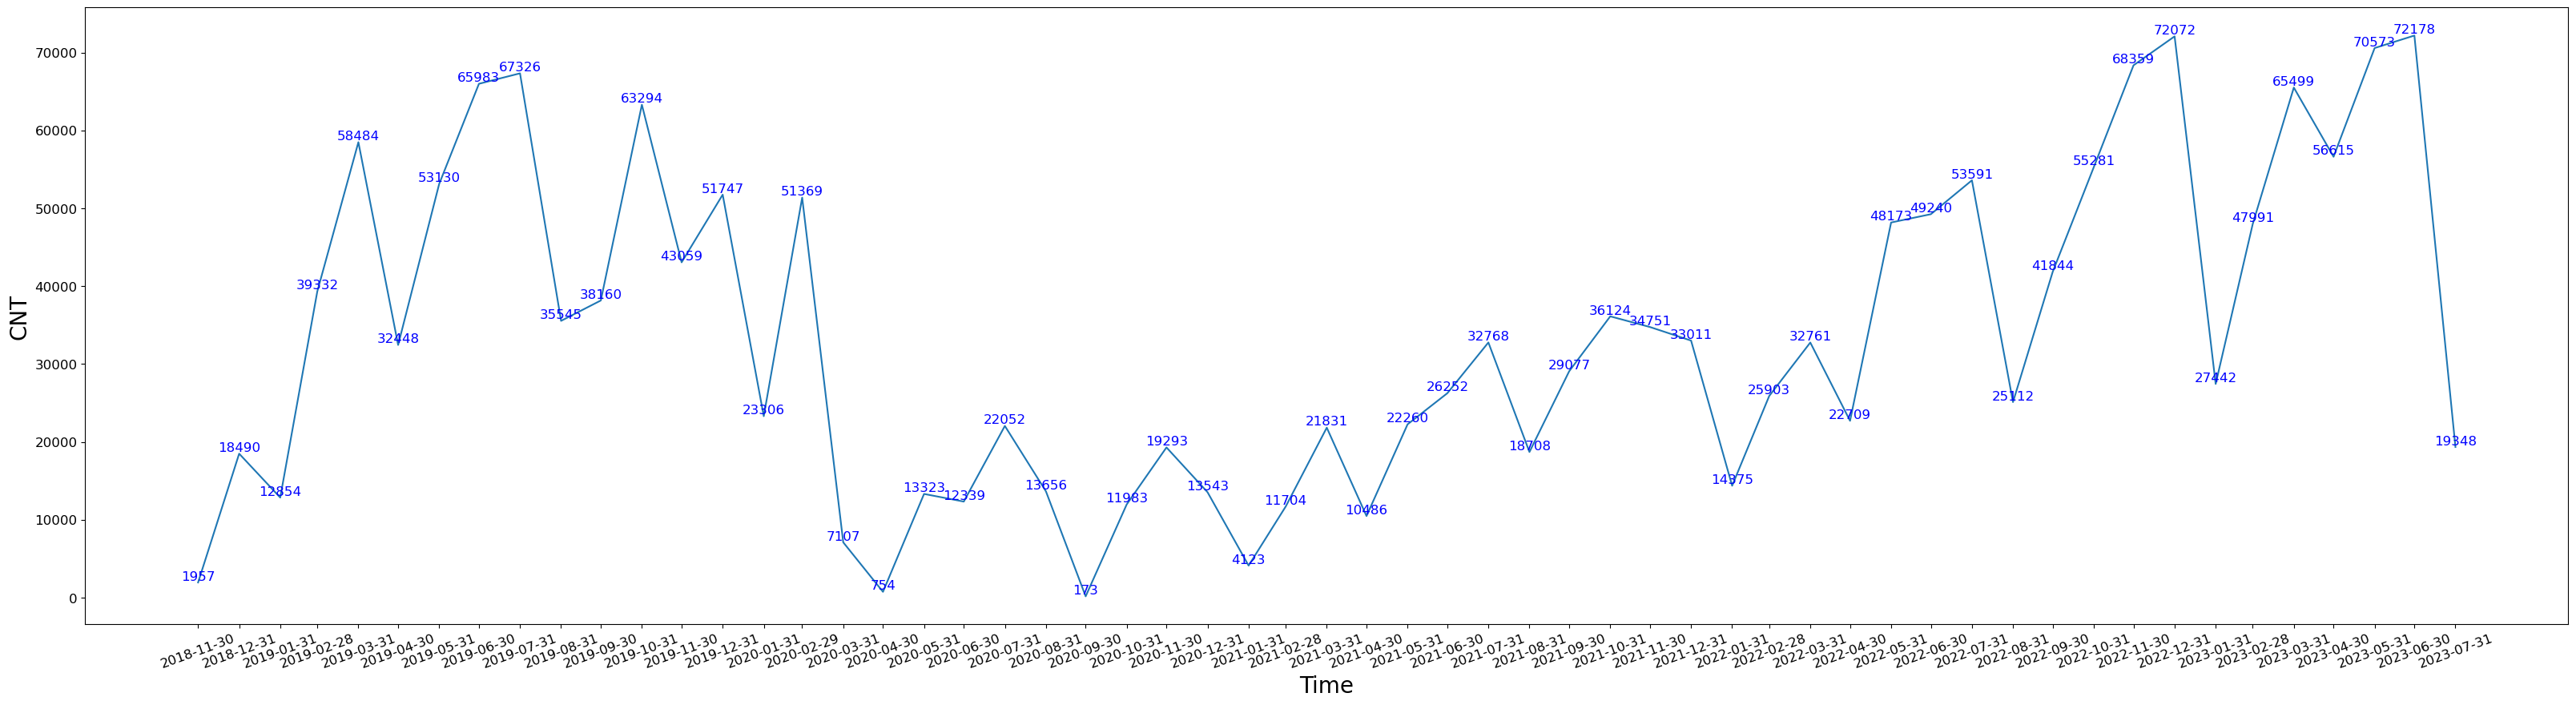

In [56]:
x = data_m.index # x축(시간 정보)
y = data_m # y축 값(데이터 개수)

plt.figure(figsize = (40, 10)) # 전체 figure 크기
plt.plot(data_m) # 그래프 시각화

# 값 시각화
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 12, 
             color = 'blue',
             horizontalalignment ='center',
             verticalalignment = 'bottom')
plt.xticks(x, fontsize = 12, rotation = 20) # x축
plt.yticks(fontsize = 12) # y축 눈금
plt.xlabel('Time', fontsize = 20) # x축 이름
plt.ylabel('CNT', fontsize = 20) # y축 이름

# 월별로 크게 의미는 없다

In [57]:
data.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,tran_date,tran_time,play_date,...,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn,cnt
play_date,,,,,,,,,,,,,,,,,,,,,
2022-02-04,50.0,F,골드,무료,그린,NaN,NaN,20220114,1512,2022-02-04,...,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y,1
2021-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211003,1550,2021-10-09,...,초대권,1120,NaN,20210823.0,독주,리사이틀홀,90,15,N,1
2022-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220917,1520,2022-11-05,...,초대권,2283,20220911.0,20220911.0,독주,IBK챔버홀,80,15,N,1
2019-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190630,1132,2019-07-31,...,초대권,2798,NaN,20190701.0,독주,리사이틀홀,90,15,N,1
2022-03-02,50.0,M,무료,NaN,NaN,NaN,NaN,20220206,1615,2022-03-02,...,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y,1


In [58]:
data['genre'].value_counts()

교향곡      547382
독주       434579
실내악      339716
클래식      305782
합창       117683
성악        80210
콘서트       27112
오페라       22613
복합장르       9416
기타         6452
크로스오버      2211
재즈         1325
전시          266
무용          155
가족극         124
Name: genre, dtype: int64